# 1 Import de bibliotecas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from hypopt import GridSearch

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier    # MLP

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2 Pre-processamento

In [2]:
df_test = pd.read_csv('test.csv')
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df = pd.concat([df_train,df_test],ignore_index=True)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 46.5+ MB


In [6]:
df.isnull().sum()

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [7]:
df = df[(df['Response'] == 1) | (df['Response'] == 0)]
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0.0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0.0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0.0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0.0


In [8]:
df = df.drop_duplicates()

In [9]:
rows, columns = df.shape
rows

381109

In [10]:
df.drop(columns=['id'])

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0.0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0.0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0.0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0.0


In [11]:
### Preparando a base de dados para treinamento
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['Vehicle_Age'] = df['Vehicle_Age'].map( {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2 } ).astype(int)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1.0
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0


In [12]:
X = df.drop(columns=['id','Response'])
y = df['Response']

In [13]:
nr = NearMiss()
X, y = nr.fit_resample(X, y)

In [14]:
X.shape

(93420, 10)

In [15]:
y.shape

(93420,)

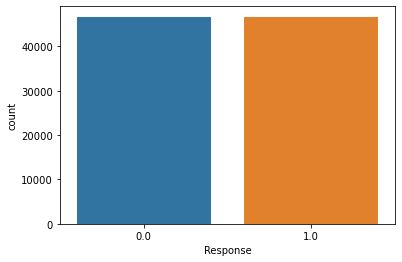

In [16]:
ax = sns.countplot(x=y)

## 2.1 Todos os dados

In [13]:
X_df = df.drop(columns=['id','Response'])
y_df = df['Response']

## 2.2 Dados de pessoas sem interesse

In [14]:
df_no = df[(df['Response'] == 0)]
df_no.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0
5,6,0,24,1,33.0,0,0,1,2630.0,160.0,176,0.0
6,7,1,23,1,11.0,0,0,1,23367.0,152.0,249,0.0


In [15]:
X_df_no = df_no.drop(columns=['id','Response'])
y_df_no = df_no['Response']

# 3 Avaliação acurácia sobre dados de treino, teste e todos os dados.

## 3.1 Treinamento Random Forest

In [52]:
X = df.drop(columns=['id','Response'])
y = df['Response']

nr = NearMiss()
X, y = nr.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
clf = pipe.fit(X_train, y_train)

##Predicts na base de teste e todos dados
y_test_pred = clf.predict(X_test)
y_df_pred = clf.predict(X_df)


print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print("DF Score:\n",clf.score(X_df,y_df)*100)
print("")
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

Test Data Score:
 90.63012916577465

DF Score:
 36.368597960163626

Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.84      1.00      0.91     14013
         1.0       1.00      0.81      0.90     14013

    accuracy                           0.91     28026
   macro avg       0.92      0.91      0.91     28026
weighted avg       0.92      0.91      0.91     28026


Classification DF:
               precision    recall  f1-score   support

         0.0       0.92      0.30      0.45    334399
         1.0       0.14      0.82      0.24     46710

    accuracy                           0.36    381109
   macro avg       0.53      0.56      0.35    381109
weighted avg       0.83      0.36      0.43    381109


Confusion Matrix Test:
 [[13988    25]
 [ 2601 11412]]

Confusion Matrix DF:
 [[100363 234036]
 [  8469  38241]]



In [49]:
clf.score(X_train,y_train)

0.91005291005291

In [50]:
clf.score(X_test,y_test)

0.9062299293513166

In [51]:
clf.score(X_df,y_df)

0.37335512937243676

Avaliando-se a acurácia sobre os dados de todo dataset, observamos que o modelo cai bastante em performance (90,61% de acurácia sobre os dados de teste e 36,55% sobre os dados de produção)
Indicando que a técnica de amostragem com rebalanceamento das classes em 50% / 50% não foi efetiva para o aprendizado e generalização do modelo.


## 3.2 Próximos passos

Variar a taxa de rebalanceamento (split) nos dados de amostragem a fim de aumentar o aprendizado do modelo. Uma função de custo personalizada será adotada para selecionar o melhor modelo.

# 4 Definição da função de custo para seleção de modelo

Definições:

- <b>Custo abordagem:</b> Custos relacionados a abordagem de clientes sem interesse devido ao erro de classificação da classe 0
- <b>Custo oportunidade:</b> Custos relacionados ao custo de oportunidade da não abordagem e aquisição de seguros de veículos por clientes com interesse devido ao erro de classificação da classe 1

         Custo total = Custo abordagem (Cab) + Custo oportunidade (Cop)

Onde:

    Cab = (1-Rec0)* (1-%int) * Pop0 * Mcab
    Cop = (1-Rec1) * %int * Pop0 * Mcop

Em que:

    Rec0: Recall do modelo em relação à classe 0
    Rec1: Recall  do modelo em relação à classe 1
    %int: % Pessoas interessadas ao oferecer desconto
    Pop0: Número de registros de pessoas não interessadas
    Mcab: Média Custo Abordagem Individual
    Mcob: Média de Custo Oportunidade individual


Equação:

       Custo = (1 Rec0)* (1-%int) * Pop0 * Mcab + (1-Rec1) * %int * Pop0 * Mcop
       
Chamando:

    N = Mcop / Mcab 
    
Então:

    Mcop = N * Mcab
    
Substituindo na equação:

    Custo = (1-Prec0)* 0,8925 * 334399 * Mcab + (1-Prec1) * 0,1075 * 334399 * N * Mcab

Fatorando:

    Custo = Mcab * ( ( (1-Rec0) * (1-%int) * 33439) + (N * (1-Rec1) * %int * 334399 )
    
- A proporção de pessoas interessadas (%int) após a oferta de 10% de desconto é uma variável mensurável escolhendo-se um modelo e utilizando-se as métricas de recall das classes para inferir quantas pessoas terão de fato interesse após a oferta do desconto, conforme desenvolvido na <b>seção 4.1.</b>

- A proporção entre os custos de oportunidade e custo de abordagem é uma variável dependente do negócio mas é possível estimá-la conforme desenvolvido na <b>seção 4.2.<b/>

## 4.1 Estimativa do valor de % Interessados (%Int)

Escolheremos o modelo random forest com a taxa de rebalanceamento de 0,46 que possui as seguintes métricas de performance:
- Recall 0: 0,7199692582812748, 
- Recall 1: 0,7402911582102334, 
- Precisão 0: 0,9520301477333839, 
- Precisão 1: 0,2696828132677175

In [18]:
X = df.drop(columns=['id','Response'])
y = df['Response']

nr = NearMiss(sampling_strategy = 0.46)
X, y = nr.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
clf = pipe.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)
y_df_pred = clf.predict(X_df)

print("Test Data Score:\n",clf.score(X_test,y_test)*100)
print("")
print("DF Score:\n",clf.score(X_df,y_df)*100)
print("")
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

Test Data Score:
 77.97913481428186

DF Score:
 72.24599786412811

Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.87      0.80      0.83     30463
         1.0       0.63      0.74      0.68     14013

    accuracy                           0.78     44476
   macro avg       0.75      0.77      0.76     44476
weighted avg       0.79      0.78      0.78     44476


Classification DF:
               precision    recall  f1-score   support

         0.0       0.95      0.72      0.82    334399
         1.0       0.27      0.74      0.40     46710

    accuracy                           0.72    381109
   macro avg       0.61      0.73      0.61    381109
weighted avg       0.87      0.72      0.77    381109


Confusion Matrix Test:
 [[24378  6085]
 [ 3709 10304]]

Confusion Matrix DF:
 [[240757  93642]
 [ 12131  34579]]



In [19]:
## Realizando predict sobre os dados de classe 0:
df_no = df[(df['Response'] == 0)]
df_no.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0
5,6,0,24,1,33.0,0,0,1,2630.0,160.0,176,0.0
6,7,1,23,1,11.0,0,0,1,23367.0,152.0,249,0.0


In [20]:
X_df_no = df_no.drop(columns=['id','Response'])
y_df_no = df_no['Response']

### 4.1.1 Sem oferecer desconto o modelo acerta 71,99% das classes 0 conforme previsto

In [21]:
clf.score(X_df_no,y_df_no)*100

71.99692582812747

In [23]:
y_pred = clf.predict(X_df_no)

In [24]:
len(y_pred)

334399

In [25]:
y_pred.sum()

93642.0

In [26]:
print("Confusion Matrix Test:\n",confusion_matrix(y_df_no,y_pred))

Confusion Matrix Test:
 [[240757  93642]
 [     0      0]]


### 4.1.2 Oferecendo desconto de 10%

In [27]:
X_df_no['Annual_Premium'] = X_df_no['Annual_Premium']*0.9

In [28]:
y_df_pred = clf.predict(X_df_no)

In [29]:
len(y_df_pred)

334399

In [30]:
y_df_pred.sum()

89761.0

O modelo prediz que agora há 89761 pessoas pertencentes à classe 1 após ofertar 10% de desconto.

### 4.1.3 Matriz de confusão:
    
             0       1
          0 (X       K)
          1 (P       Y)

     Tot:  244.638  89761
     
Em que: K = 89761 - Y e P = 244.638-X

             0           1
          0 (X           89761 - Y)
          1 (244.638-X   Y        )
          
       Tot:  244.638       89761

Precisão 0: 0,9520301477333839, Precisão 1: 0,2696828132677175

- Como a precisão da classe 0 é 0,9520 então X = 0,9520 * 244638 =>    X = 232.903
- Como a precisão da classe 1 é 0,2697 então Y = 0,2697 * 89761 =>     Y =  24.207


             0               1            Tot
          0 (232.903       65.554)       298.457
          1 (11.735        24.207)       35.942

     Tot:   244.638         89.761       334.399

### 4.1.4 Interpretação
- Dos 334.399 registros de pessoas sem interesse (Classe 0), após ofertar 10% de desconto o modelo classificou 244.638 delas como pessoas não interessadas (Classe 0) sendo 232.903 classificadas corretamente e 11.735 classificadas erroneamente. Há, portanto, 11.735 pessoas interessadas de fato e que não chegarão a ser ofertadas o seguro de veículo que contribuirão para o aumento do custo de oportunidade.

- Dos 334.399 registros de pessoas sem interesse (Classe 0),  após ofertar 10% de desconto o modelo classificou 89.761 delas como pessoas interessadas (Classe 1) sendo 65.554 classificadas erroneamente e 24.207 classificadas corretamente. Há, portanto, 24.207 interessadas de fato e 65.554 que serão abordadas e recusarão a oferta que contribuirão para o aumento do custo de abordagem.

            Total de pessoas interessadas: 11.735 + 24.207 = 35.942
            % Interessados após oferta de 10% de desconto: 35.942 / 334.399 = 0,1074823788348649 = 10,75%



- 10,75% das pessoas tendem a adquirir seguro de veículos após a oferta de 10% de desconto no seguro de saúde.

### 4.1.5 % Interessados (% Int) = 10,75% 
( ao oferecer 10% de desconto )

## 4.2 Estimativa da proporção de custos (N)

    N = Mcop / Mcab 
    
O custo de abordagem de um cliente pode variar de acordo com cada cliente. A visita domiciliar a um cliente pode custar mais que um telefonema, por exemplo.


#### 4.2.1 Custo de abordagem

- Um mês tem em média 160 horas trabalhadas, 
- Supondo que cada telefonema para oferta do seguro tem uma duração de 20
- Supondo que um telefonema de 20 minutos custa 2,00 reais
- Supondo que a média do salário de um vendedor seja 2.500,00 reais mensais
- A hora de um vendedor custa 15,62 reais.
- O custo médio para deslocamento do vendedor ao cliente é de 12 reais.
- Um vendedor demora cerca de 2 horas de deslocamento ida e volta até o cliente.

Cabmin = 2 (Custo telefonema) + 20/60  * 15,62 (Horas trabalhadas) = 7,21
Cabmax = 2 (Custo telefonema) + 120/60 * 15,62 (Horas trabalhadas) + 12 (Combustivel) = 45,24

Como não há informações sobre como os clientes são abordados adotaremos a média simples para calcular a média do custo de abordagem:

<b> Mcab </b> = (7,21 + 45,24) / 2 = 26,23

####  4.2.2 Custo de oportunidade
- Supondo que a parcela de um seguro de saúde seja de 70 reais ou 840,00 anuais.
- Supondo que o valor do seguro de veículo seja igual ao seguro de saúde.

Mcop = Valor seguro do veículo - (Valor seguro de saude * desconto) - Custo abordagem do cliente
Mcop = 840 - 840 * 10% - 26,23
Mcop = 729,77

#### 4.2.3 Proporção Custo de Oportunidade vs Custo de Abordagem (N) = 28

N = Mcop / Mcab = 729,77/ 26,23 = 28

# 5 Avaliação do Modelo

## 5.1 Avaliando a performance para multiplos valores de N

In [16]:
def recall0(y_true, y_pred):
    matrix = confusion_matrix(y_true,y_pred)
    TP = matrix[0,0]
    FN = matrix[0,1]
    
    rec0 = TP / (TP + FN)

    return rec0

In [17]:
def recall1(y_true, y_pred):
    matrix = confusion_matrix(y_true,y_pred)
    FP = matrix[1,0]
    TN = matrix[1,1]
    
    rec1 = TN / (TN + FP)

    return rec1

In [102]:
N = [5,10,15,20,25,30,35,40]
Split = [0.15,0.20,0.25,0.30,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
Custos = []
Resumo = []

In [103]:
for i in Split:
    
    print(i)


    X = df.drop(columns=['id','Response'])
    y = df['Response']

    nr = NearMiss(sampling_strategy=i)
    X, y = nr.fit_resample(X, y)
    
        ##smt = SMOTE(sampling_strategy = i)
        ##X, y = smt.fit_resample(X, y)


        ###Split dos dados em treinamento, validacao e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

    pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
    clf = pipe.fit(X_train, y_train)

    scoretreino = clf.score(X_train,y_train)
    scoreteste = clf.score(X_test,y_test)
    scoreprod = clf.score(X_df,y_df)
        
    y_test_pred = clf.predict(X_test)
    y_df_pred = clf.predict(X_df)
       
    rec0 = recall0(y_df, y_df_pred)
    rec1 = recall1(y_df, y_df_pred)
        
    for k in N:
        
        
        CustoAb = (1-rec0) * 0.8925 * 334399
        CustoOp = k * (1-rec1) * 0.1075 * 334399

        Custo =  CustoAb + CustoOp

        Perc_CustoAb = CustoAb/Custo 
        Perc_CustoOp = CustoOp/Custo

        Custos.append(Custo)
        Resumo.append(np.array([k,i,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))


0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95


In [104]:
df_resumo = pd.DataFrame(np.array(Resumo), columns=['N', 'Split','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [136]:
df_resumo.head()

,N,Split,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
0,5.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.005336,0.994664,178463.775654
1,10.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.002675,0.997325,355975.253809
2,15.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.001785,0.998215,533486.731963
3,20.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.001339,0.998661,710998.210117
4,25.0,0.15,0.871173,0.87058,0.876156,0.996809,0.012396,0.001072,0.998928,888509.688272


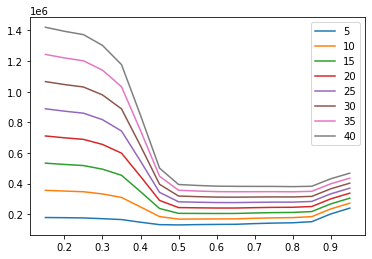

In [106]:
fig, ax = plt.subplots(1, 1)
for i in N:
    ax.plot( df_resumo[df_resumo["N"]==i].Split , df_resumo[df_resumo["N"]==i].Custo, Label = i)
    plt.legend()


- O custo atinge o mínimo utilizando dados de treinamento com split entre 0.5 á 0.9 para 5 < N < 40

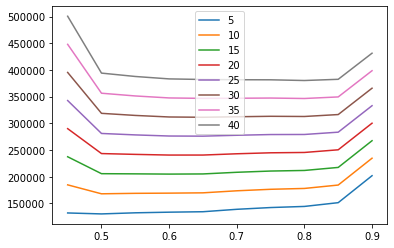

In [117]:
fig, ax = plt.subplots(1, 1)
for i in N:
    ax.plot( df_resumo[ (df_resumo["N"]==i) & (df_resumo["Split"]>=0.45) & (df_resumo["Split"]<=0.9) ].Split , 
            df_resumo[ (df_resumo["N"]==i) & (df_resumo["Split"]>=0.45) & (df_resumo["Split"]<=0.9) ].Custo, 
            Label = i)
    plt.legend()

In [118]:
df_resumo[ (df_resumo["N"]==35) & (df_resumo["Split"]>=0.45) & (df_resumo["Split"]<=0.9) ]

,N,Split,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
54,35.0,0.45,0.781998,0.776759,0.731024,0.734395,0.706894,0.176923,0.823077,448049.574048
62,35.0,0.50,0.799982,0.795785,0.702489,0.690238,0.790195,0.259381,0.740619,356420.613117
70,35.0,0.55,0.815660,0.812494,0.693662,0.679245,0.796874,0.272503,0.727497,351297.439989
78,35.0,0.60,0.833184,0.831835,0.688362,0.672571,0.801413,0.281149,0.718851,347579.087608
86,35.0,0.65,0.852022,0.849488,0.685240,0.668797,0.802954,0.285057,0.714943,346766.037270
94,35.0,0.70,0.870488,0.865862,0.670281,0.651192,0.806936,0.299997,0.700003,347010.105983
102,35.0,0.75,0.885232,0.883078,0.659475,0.638498,0.809655,0.310586,0.689414,347377.908235
110,35.0,0.80,0.899629,0.894323,0.652246,0.629879,0.812374,0.318769,0.681231,346529.232988
118,35.0,0.85,0.908689,0.908718,0.629951,0.603937,0.816185,0.338235,0.661765,349477.078960
126,35.0,0.90,0.912904,0.910151,0.480839,0.433817,0.817469,0.423893,0.576107,398633.464512


In [167]:
for i in N:
    CustoMinimo = df_resumo[ (df_resumo["N"]==i)].Custo.min()
    SplitCustoMinimo = df_resumo[ (df_resumo["Custo"]==CustoMinimo) ].Split.min()
    PropOP = df_resumo[ (df_resumo["Custo"]==CustoMinimo) ].Perc_CustoOP.min()
    Recall_1 = df_resumo[ (df_resumo["Custo"]==CustoMinimo) ].Recall_1_Prod.min()
    print("N:",i, "Split Cmin: ", SplitCustoMinimo,  "Custo Mínimo: ", f'{CustoMinimo:6g}', "Recall Classe 1 :", f'{Recall_1:.3g}', "Proporção do custo de Op: ", f'{PropOP:.3g}' )

N: 5 Split Cmin:  0.5 Custo Mínimo:  130159 Recall Classe 1 : 0.79 Proporção do custo de Op:  0.29
N: 10 Split Cmin:  0.5 Custo Mínimo:  167869 Recall Classe 1 : 0.79 Proporção do custo de Op:  0.449
N: 15 Split Cmin:  0.6 Custo Mínimo:  204803 Recall Classe 1 : 0.801 Proporção do custo de Op:  0.523
N: 20 Split Cmin:  0.6 Custo Mínimo:  240497 Recall Classe 1 : 0.801 Proporção do custo de Op:  0.594
N: 25 Split Cmin:  0.65 Custo Mínimo:  275932 Recall Classe 1 : 0.803 Proporção do custo de Op:  0.642
N: 30 Split Cmin:  0.65 Custo Mínimo:  311349 Recall Classe 1 : 0.803 Proporção do custo de Op:  0.683
N: 35 Split Cmin:  0.8 Custo Mínimo:  346529 Recall Classe 1 : 0.812 Proporção do custo de Op:  0.681
N: 40 Split Cmin:  0.8 Custo Mínimo:  380253 Recall Classe 1 : 0.812 Proporção do custo de Op:  0.71


## 5.1.2 Resultados
- Os dados são naturalmente desbalanceados, cerca de 13% dos exemplos pertencem a classe 1.

- O Split na amostragem define a proporção entre a classe minoritária (Classe 1) vs majoritária (Classe 0) nos dados de treino e teste.

- Quanto maior a proporção Custo de Oportunidade vs Custo de abordagem maior é a importância da parcela do custo de oportunidade no calculo do custo total. Dessa forma, é dado maior importância para acertar mais as pessoas com interesse (Classe 1) em detrimento de pessoas sem interesse (Classe 0) e como consequencia disso, o split tende a aumentar.


- Para N em torno de 30 o valor de split para treinamento dos dados que minimiza a função de custo é por volta de 0.65

## 5.2 Avaliando a performance para N = 28

Para o valor de N = 28 o valor de split para treinamento dos dados que minimiza a função de custo é em torno de 0.65

In [140]:
Split = 0.65
ModeloFinal = []

In [141]:
X = df.drop(columns=['id','Response'])
y = df['Response']

nr = NearMiss(sampling_strategy= i)
X, y = nr.fit_resample(X, y)
    


 ###Split dos dados em treinamento, validacao e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) ### 

pipe = Pipeline([('z-score', StandardScaler()),
                ('reduce_dim', PCA(n_components=2)),
                ('classify',
                 RandomForestClassifier(criterion='entropy', max_depth=10))])
clf = pipe.fit(X_train, y_train)

scoretreino = clf.score(X_train,y_train)
scoreteste = clf.score(X_test,y_test)
scoreprod = clf.score(X_df,y_df)
        
y_test_pred = clf.predict(X_test)
y_df_pred = clf.predict(X_df)
       
rec0 = recall0(y_df, y_df_pred)
rec1 = recall1(y_df, y_df_pred)
        
    
      
CustoAb = (1-rec0) * 0.8925 * 334399
CustoOp = k * (1-rec1) * 0.1075 * 334399

Custo =  CustoAb + CustoOp

Perc_CustoAb = CustoAb/Custo 
Perc_CustoOp = CustoOp/Custo

ModeloFinal.append(np.array([28,i,scoretreino,scoreteste,scoreprod,rec0,rec1,Perc_CustoAb,Perc_CustoOp,Custo]))

In [142]:
ModeloFinal = pd.DataFrame(np.array(ModeloFinal), columns=['N', 'Split','Acuracia_Treino', 'Acuracia_Teste', 'Acuracia_Prod', 'Recall_0_Prod','Recall_1_Prod','Perc_CustoAB','Perc_CustoOP','Custo']) 

In [143]:
ModeloFinal.head()

,N,Split,Acuracia_Treino,Acuracia_Teste,Acuracia_Prod,Recall_0_Prod,Recall_1_Prod,Perc_CustoAB,Perc_CustoOP,Custo
0,28.0,0.65,0.852444,0.84932,0.684271,0.667655,0.803233,0.259573,0.740427,382123.65197


In [144]:
print("Classification Report Test:\n",classification_report(y_test,y_test_pred))
print("")
print("Classification DF:\n",classification_report(y_df,y_df_pred))
print("")
print("Confusion Matrix Test:\n",confusion_matrix(y_test,y_test_pred))
print("")
print("Confusion Matrix DF:\n",confusion_matrix(y_df,y_df_pred))
print("")

Classification Report Test:
               precision    recall  f1-score   support

         0.0       0.87      0.88      0.88     21559
         1.0       0.82      0.80      0.81     14013

    accuracy                           0.85     35572
   macro avg       0.84      0.84      0.84     35572
weighted avg       0.85      0.85      0.85     35572


Classification DF:
               precision    recall  f1-score   support

         0.0       0.96      0.67      0.79    334399
         1.0       0.25      0.80      0.38     46710

    accuracy                           0.68    381109
   macro avg       0.61      0.74      0.59    381109
weighted avg       0.87      0.68      0.74    381109


Confusion Matrix Test:
 [[19036  2523]
 [ 2837 11176]]

Confusion Matrix DF:
 [[223263 111136]
 [  9191  37519]]



- Acurácia dados treino = 0.852444
- Acurácia dados de teste = 0.84932


- Acurácia todos dados = 0.684271
- Recall classe 0 = 0,6676545085362097
- Recall classe 1 = 0,8032327124812674
- Precisão classe 0 = 0,9604609944333072
- Precisão classe 1 = 0,2523897615283711

# 6 Predição

## 6.1 Oferecendo 10% de desconto à pessoas sem interesse

In [172]:
### Df com pessoas sem interesse
df_no = df[(df['Response'] == 0)]
df_no.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0.0
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0.0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0.0
5,6,0,24,1,33.0,0,0,1,2630.0,160.0,176,0.0
6,7,1,23,1,11.0,0,0,1,23367.0,152.0,249,0.0


In [173]:
#### Oferecendo 10% de desconto
X_df_no['Annual_Premium'] = X_df_no['Annual_Premium']*0.9
X_df_no.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
1,1,76,1,3.0,0,1,0,27164.16,26.0,183
3,1,21,1,11.0,1,0,0,23181.39,152.0,203
4,0,29,1,41.0,1,0,0,22271.76,152.0,39
5,0,24,1,33.0,0,0,1,2130.30,160.0,176
6,1,23,1,11.0,0,0,1,18927.27,152.0,249


In [174]:
### Predizendo pessoas com interesse
y_df_pred = clf.predict(X_df_no)

In [175]:
len(y_df_pred)

334399

In [176]:
## Quantidade de pessoas com interesse
y_df_pred.sum()

107474.0

## 6.2 Matriz de Confusão

             0       1
          0 (X       K)
          1 (P       Y)

      Tot:  226.925  107474
 
Em que: K = 107474 - Y e P = 226.925-X

           0           1
        0 (X           107474 - Y)
        1 (226.925-X   Y        )

     Tot:  226.925       107474
   
Precisão 0: 0,9604609944333072, Precisão 1: 0,2523897615283711

- Como a precisão da classe 0 é 0,9605 então X = 0,9605 * 226.925 => X = 218.953
- Como a precisão da classe 1 é 0,2524 então Y = 0,2524 * 107474 => Y = 27.125
            
            0               1            Tot
        0 (218.953        80.349)       299.302
        1 (7.972          27.125)       35.097
           
      Tot: 226.925        107474        334.399

 
### 6.2.1 Interpretação
- Dos 334.399 registros de pessoas sem interesse (Classe 0), após ofertar 10% de desconto o modelo classificou 226.925 delas como pessoas não interessadas (Classe 0) sendo 218.953 classificadas corretamente e 7.972 classificadas erroneamente. Há, portanto, 7.972 pessoas interessadas de fato e que não chegarão a ser ofertadas o seguro de veículo.



- Dos 334.399 registros de pessoas sem interesse (Classe 0), após ofertar 10% de desconto o modelo classificou 107.474 delas como pessoas interessadas (Classe 1) sendo 80.349 classificadas erroneamente e 27.1257 classificadas corretamente. Há, portanto, 27.125 interessadas de fato e 80.349 que serão abordadas e recusarão a oferta.


- Há, portanto, 35.097 pessoas interessadas de fato após a oferta do desconto (10,50% interessados)

## 6.3 Custos

- Cab = 80.349 * MCab
- Cop = 7.972 * MCop